In [ ]:
# Read text file and split lines
import pandas as pd
with open('train_data.txt', 'r') as file:
    lines = file.readlines()

# Parse lines and split by comma (example: CSV format)
data = [line.strip().split(':::') for line in lines]

# Convert to DataFrame
dfs = pd.DataFrame(data)

# Write DataFrame to a CSV file
dfs.to_csv('train_data.csv', index=False)


In [ ]:
ds=pd.read_csv('/content/train_data.csv')
ds

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
ds.rename(columns={'1':'movie','2':'genre','3':'description'},inplace=True)

In [ ]:
ds.drop(['0'],axis=1,inplace=True)

In [ ]:
ds

,movie,genre,description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54209,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
ds['genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [ ]:
ds['genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

In [ ]:
ds['category']=ds['genre'].map({
    ' drama ':0,' thriller ':1,' adult ':2,' documentary ':3, ' comedy ':4,
       ' crime ':5, ' reality-tv ':6, ' horror ':7, ' sport ':8, ' animation ':9,
       ' action ':10, ' fantasy ':11, ' short ':12, ' sci-fi ':13, ' music ':14,
       ' adventure ':15, ' talk-show ':16, ' western ':17, ' family ':18, ' mystery ':19,
       ' history ':20, ' news ':21, ' biography ':22, ' romance ':23, ' game-show ':24,
       ' musical ':25, ' war ':26
})
ds.head()

,movie,genre,description,category
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,0
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,2
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,0
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,0


<Axes: ylabel='count'>

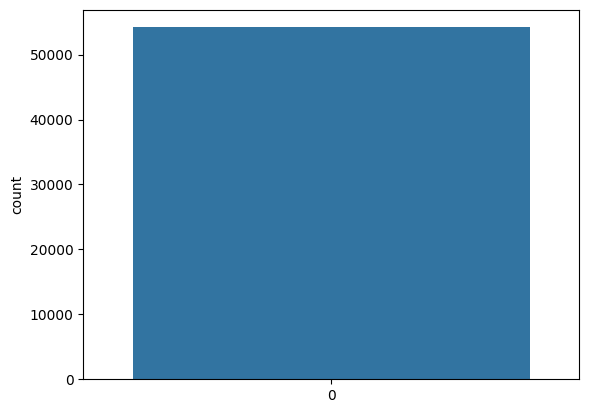

In [ ]:
import seaborn as sns
sns.countplot(data=ds.category)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ds.description,ds.category,test_size=0.2,random_state=100,stratify=ds.category)

In [ ]:
log=Pipeline([
    ('vectorizer_tfidf',TfidfVectorizer()),
    ('log',LogisticRegression())
])
log.fit(x_train,y_train)
pred=log.predict(x_test)
print(classification_report(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.53      0.79      0.63      2723
           1       0.42      0.11      0.17       318
           2       0.59      0.16      0.25       118
           3       0.64      0.87      0.74      2619
           4       0.56      0.59      0.58      1490
           5       0.33      0.02      0.04       101
           6       0.63      0.16      0.26       177
           7       0.71      0.57      0.63       441
           8       0.76      0.19      0.30        86
           9       0.75      0.03      0.06       100
          10       0.54      0.24      0.33       263
          11       0.00      0.00      0.00        65
          12       0.52      0.29      0.37      1015
          13       0.59      0.20      0.30       129
          14       0.68      0.38      0.49       146
          15       0.76      0.10      0.18       155
          16       0.68      0.22      0.33        78
          17       0.94    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x=ds.description
y=ds.genre
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the movie descriptions into numerical features
X = tfidf_vectorizer.fit_transform(x)
# Display class distribution before applying SMOTE
print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after applying SMOTE
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({' drama ': 13613, ' documentary ': 13096, ' comedy ': 7447, ' short ': 5073, ' horror ': 2204, ' thriller ': 1591, ' action ': 1315, ' western ': 1032, ' reality-tv ': 884, ' family ': 784, ' adventure ': 775, ' music ': 731, ' romance ': 672, ' sci-fi ': 647, ' adult ': 590, ' crime ': 505, ' animation ': 498, ' sport ': 432, ' talk-show ': 391, ' fantasy ': 323, ' mystery ': 319, ' musical ': 277, ' biography ': 265, ' history ': 243, ' game-show ': 194, ' news ': 181, ' war ': 132})
After SMOTE: Counter({' drama ': 13613, ' thriller ': 13613, ' adult ': 13613, ' documentary ': 13613, ' comedy ': 13613, ' crime ': 13613, ' reality-tv ': 13613, ' horror ': 13613, ' sport ': 13613, ' animation ': 13613, ' action ': 13613, ' fantasy ': 13613, ' short ': 13613, ' sci-fi ': 13613, ' music ': 13613, ' adventure ': 13613, ' talk-show ': 13613, ' western ': 13613, ' family ': 13613, ' mystery ': 13613, ' history ': 13613, ' news ': 13613, ' biography ': 13613, ' romanc

In [ ]:
y_resampled.shape

(367551,)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset (X_resampled, y_resampled) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)


In [ ]:
print('x_train,x_test,y_train,y_test : ',X_train, X_test, y_train, y_test)

x_train,x_test,y_train,y_test :    (0, 62983)	0.06046480417805906
  (0, 61502)	0.03998524104703573
  (0, 106855)	0.08027716784896459
  (0, 47369)	0.06791482731500427
  (0, 89116)	0.034587153300398354
  (0, 47188)	0.04493048425709893
  (0, 117484)	0.016746960354510017
  (0, 39684)	0.07250791569542168
  (0, 107578)	0.017298689557277824
  (0, 30630)	0.033098805010075
  (0, 56081)	0.028900107080940537
  (0, 5892)	0.03321542202149385
  (0, 17335)	0.025440599100897784
  (0, 107718)	0.05630397646904387
  (0, 76603)	0.03113456330996134
  (0, 95693)	0.03308629631725822
  (0, 78203)	0.027313664431865375
  (0, 11046)	0.032042987599761034
  (0, 117326)	0.019791758477818427
  (0, 103235)	0.05343932044247176
  (0, 97682)	0.05265942269196262
  (0, 39555)	0.033628778840358316
  (0, 110638)	0.038751536437964605
  (0, 4580)	0.02703815091181776
  (0, 116721)	0.027482569832228625
  :	:
  (275662, 63708)	0.06706335944553662
  (275662, 108742)	0.043493228288963764
  (275662, 12458)	0.06682745756634169
  (27

In [ ]:

# Assuming you have X_resampled and y_resampled as balanced features and labels

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and Logistic Regression
log = Pipeline([
     # Ensure TF-IDF vectorization is performed on raw text
    ('log', LogisticRegression(solver='saga', max_iter=500))
])

# Fit the pipeline on training data
log.fit(X_train, y_train)

# Predict on test data
predy = log.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predy))


               precision    recall  f1-score   support

      action        0.93      0.96      0.95      2626
       adult        0.98      1.00      0.99      2761
   adventure        0.97      0.99      0.98      2684
   animation        0.98      1.00      0.99      2790
   biography        0.99      1.00      0.99      2710
      comedy        0.80      0.75      0.77      2712
       crime        0.97      1.00      0.98      2691
 documentary        0.79      0.73      0.76      2667
       drama        0.72      0.58      0.64      2775
      family        0.96      0.99      0.97      2696
     fantasy        0.99      1.00      0.99      2854
   game-show        1.00      1.00      1.00      2700
     history        0.99      1.00      0.99      2763
      horror        0.95      0.95      0.95      2697
       music        0.97      1.00      0.98      2696
     musical        0.99      1.00      0.99      2718
     mystery        0.99      1.00      0.99      2730
        n

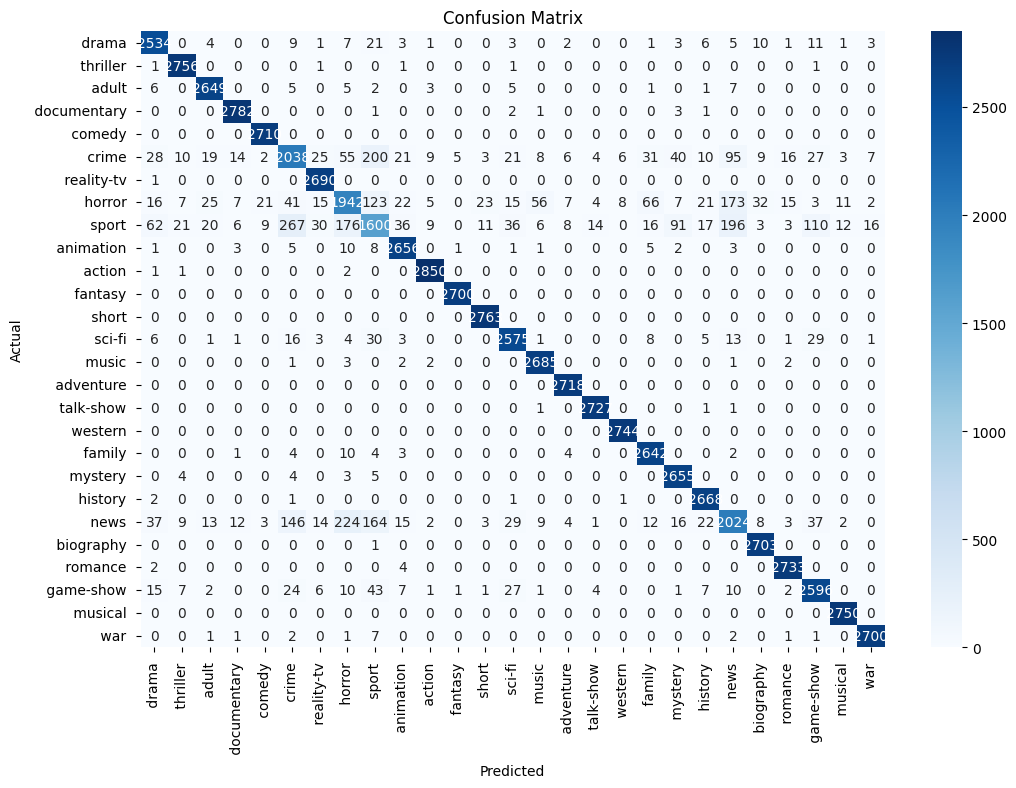

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pred contains predicted labels and y_test contains actual labels

# Generate confusion matrix
cm = confusion_matrix(y_test, predy)
labels=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war ']
# Plotting the confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
ds.description[5100],ds.genre[5100]

(' All is quite, all is calm, on Christmas Eve on the street of a sleepy little village, when a mysterious Santa arrives to hand out strange presents. But as a family disappear with ominous notes left about Krampus, little do people know things are about to turn into the darkest Christmas they have ever known, as a series of terrifying events are about to change the festive season forever.',
 ' horror ')

In [ ]:
# Assuming log is the trained pipeline (TfidfVectorizer + LogisticRegression)

# Get a single description for prediction (for example, the first description)
single_description = ds.description[5100]

# Transform the single description into a numeric format using TF-IDF vectorization
numeric_description = tfidf_vectorizer.transform([single_description])

# Predict the genre for the single description
predicted_genre = log.predict(numeric_description)

# Display the predicted genre
print("Predicted Genre:", predicted_genre)


Predicted Genre: [' horror ']


In [ ]:
print('y_test : \n',y_test[:5],'after predicted data : \n',predy[:5])

y_test : 
 217392     musical 
36971        drama 
125262       crime 
149345      family 
187916     history 
Name: genre, dtype: object after predicted data : 
 [' musical ' ' drama ' ' crime ' ' family ' ' history ']


In [ ]:
#import joblib  # Import joblib for model persistence

# Assuming you have already trained your model and named it 'log'

# Save the trained model to a file using joblib
#joblib.dump(log, 'genre_classification_model.pkl')


['genre_classification_model.pkl']